In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

epa_df = pd.read_csv("epadatabase.csv")
epa_df

,STATEFP,Region,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,...,D4E,D5AR,D5AE,D5BR,D5BE,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd
0,48,Midsouth,7189384,3545715,3364458,73.595028,0.000000,73.595028,73.595028,1202,...,0.003602,433601,303660,135362,53504,6,14,15,17,14.000000
1,48,Midsouth,7189384,3545715,3364458,119.829909,0.000000,119.829909,119.214200,710,...,0.006099,386504,272135,236885,90089,3,10,12,14,10.833333
2,48,Midsouth,7189384,3545715,3364458,26.367053,0.000000,26.367053,26.367050,737,...,0.004071,404573,288925,230587,82815,1,1,7,17,8.333333
3,48,Midsouth,7189384,3545715,3364458,119.060687,0.000000,119.060687,119.060687,904,...,0.007378,423099,298058,168433,79657,16,10,17,17,15.666667
4,48,Midsouth,7189384,3545715,3364458,169.927211,0.000000,169.927211,148.742920,948,...,0.007036,335700,238166,120826,48682,4,7,11,14,10.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,78,Midwest,0,0,0,82.923548,0.000000,82.923548,78.187256,1471,...,-99999.000000,0,0,-99999,-99999,1,1,20,1,7.333333
220736,78,Midwest,0,0,0,72.260936,0.000000,72.260936,72.260936,940,...,-99999.000000,0,0,-99999,-99999,1,1,20,1,7.333333
220737,78,Midwest,0,0,0,40.014880,0.000000,40.014880,40.014880,878,...,-99999.000000,0,0,-99999,-99999,1,1,20,1,7.333333
220738,78,Midwest,0,0,0,2567.286469,1661.911327,905.375141,860.333055,1278,...,-99999.000000,0,0,-99999,-99999,1,1,10,1,4.000000


In [2]:
#Data cleaning and preprocessing
#Replacing -99999 values with 0
epa_df.replace(-99999, 0, inplace=True)

#Dropping derived columns for averages of groupings
drop_list = ["D2A_Ranked", "D2B_Ranked", "D3B_Ranked", "D4A_Ranked"]
epa_df = epa_df.drop(drop_list, axis=1)

In [3]:
#Looking for redundant columns and rows
epa_df = epa_df.drop_duplicates()
count = epa_df.nunique()
col_drop = count.loc[count.values==1].index
epa_df = epa_df.drop(col_drop, axis = 1)

In [5]:
from sklearn.impute import SimpleImputer


#Looking for null values in dataset

nulls = epa_df.isnull().sum()

for index, value in nulls.iteritems():
    if value > 0:
        print(index)
        
#These features need imputation: CountHU, HH, D1A, D1C8_OFF, D4D, D4E 
def missing_imputation(df_hr):
    categorical=df_hr.select_dtypes(exclude=[np.number])
    numerical=df_hr.select_dtypes(include=[np.number])
    num=SimpleImputer(strategy='mean')
    cat=SimpleImputer(strategy='most_frequent')
    categorical_imputed=cat.fit_transform(categorical)
    numerical_imputed=num.fit_transform(numerical)
    categorical_imputed=pd.DataFrame(categorical_imputed,columns=categorical.columns)
    numerical_imputed=pd.DataFrame(numerical_imputed,columns=numerical.columns)
    hr_imputed=pd.concat([categorical_imputed,numerical_imputed],axis=1)
    return hr_imputed

epa_df = missing_imputation(epa_df)

clone = epa_df
feature_names = clone.columns.tolist()

#Split up target and features
target = epa_df['NatWalkInd']
epa_df = epa_df.drop("NatWalkInd", axis=1)

#Encoding region feature
encoded_epa = pd.get_dummies(epa_df['Region'], prefix='Region_')
epa_df=pd.concat([epa_df,encoded_epa],axis=1)

#Dropping unneccessary
drop_list = ["STATEFP", "Region"]
epa_df = epa_df.drop(drop_list, axis=1)
epa_df

,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,...,D5AE,D5BR,D5BE,Region__Midsouth,Region__Midwest,Region__Non-Continguous,Region__Northeast,Region__Northwest,Region__Southeast,Region__Southwest
0,7189384.0,3545715.0,3364458.0,73.595028,0.000000,73.595028,73.595028,1202.0,460.0,423.0,...,303660.0,135362.0,53504.0,1,0,0,0,0,0,0
1,7189384.0,3545715.0,3364458.0,119.829909,0.000000,119.829909,119.214200,710.0,409.0,409.0,...,272135.0,236885.0,90089.0,1,0,0,0,0,0,0
2,7189384.0,3545715.0,3364458.0,26.367053,0.000000,26.367053,26.367050,737.0,365.0,329.0,...,288925.0,230587.0,82815.0,1,0,0,0,0,0,0
3,7189384.0,3545715.0,3364458.0,119.060687,0.000000,119.060687,119.060687,904.0,384.0,384.0,...,298058.0,168433.0,79657.0,1,0,0,0,0,0,0
4,7189384.0,3545715.0,3364458.0,169.927211,0.000000,169.927211,148.742920,948.0,343.0,343.0,...,238166.0,120826.0,48682.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,0.0,0.0,0.0,82.923548,0.000000,82.923548,78.187256,1471.0,685.0,573.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
220736,0.0,0.0,0.0,72.260936,0.000000,72.260936,72.260936,940.0,581.0,418.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
220737,0.0,0.0,0.0,40.014880,0.000000,40.014880,40.014880,878.0,502.0,403.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
220738,0.0,0.0,0.0,2567.286469,1661.911327,905.375141,860.333055,1278.0,1208.0,613.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0


In [6]:
#Scaling of features
from sklearn.preprocessing import StandardScaler

X = epa_df.values
y = target.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


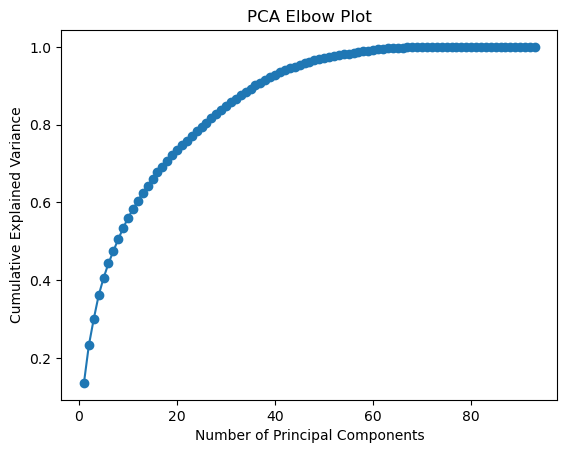

In [7]:
#Potential PCA since number of features is so high
from sklearn.decomposition import PCA

#Elbow plot
pca = PCA()
pca.fit(X_scaled)

# Plot the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('PCA Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
#PCA with 44 components for 95% of explained variance

n_components = 44

# Create a PCA instance with the specified number of components
pca = PCA(n_components=n_components)

# Fit and transform the data to the reduced dimensionality
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios: [0.13590593 0.0967208  0.06770503 0.06056696 0.04487221 0.03735615
 0.03179382 0.03065508 0.02848478 0.02640548 0.02213333 0.02172138
 0.02049308 0.01858577 0.01697425 0.01668059 0.01522785 0.01491301
 0.01398478 0.01294291 0.01248896 0.01245546 0.01228392 0.01164285
 0.01144496 0.01105665 0.01084853 0.01078669 0.01050176 0.01019526
 0.00947244 0.00942408 0.00905469 0.00860853 0.00854611 0.00805383
 0.00740582 0.00716193 0.0067203  0.00645007 0.00563612 0.00529732
 0.00490668 0.00471034]
Total Explained Variance:  0.9492764996505084


In [9]:
#Create lists for RMSE and MASE
avg_rmse_values = []
avg_mase_values = []

avg_rmse_values_npca = []
avg_mase_values_npca = []


In [10]:
#Regression Techniques
#Linear Regression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
kf = KFold(n_splits = 3, random_state = 18, shuffle=True)
rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_pca,y):
    
    X_train,X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    MSE =  mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    RMSE = np.sqrt(MSE)
    
    rmse_avg += RMSE
    mase_avg += mase
    print(lr.coef_)
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values.append(rmse_avg)
avg_mase_values.append(mase_avg)


R-squared: 0.8404522141382904
[ 0.68881845  0.08172412 -0.26240498 -0.81884633 -0.84973844  0.52181232
 -0.26133871 -0.08868002  0.2547822   0.07348696 -0.12009941  0.09682316
 -0.03734246 -0.0270116   0.00717794 -0.02504764 -0.03631024  0.07717908
  0.02537732 -0.35004154 -0.08425195 -0.22852919  0.00527697  0.09820084
  0.08861004  0.09465758  0.13795427  0.25855594 -0.37975373 -0.30422741
 -0.11277897  0.40552315 -0.02676556 -0.37991497 -0.75476816  0.1227993
 -0.01833775 -0.09628451 -0.20673495  0.33874657 -0.04774779 -0.08873071
  0.24696642 -0.12423838]
R-squared: 0.8408088857163658
[ 0.68422992  0.07652464 -0.27233355 -0.82722588 -0.83979104  0.51271715
 -0.25447199 -0.08574577  0.26399552  0.05631211 -0.13803567  0.08881037
 -0.02355834 -0.01775394  0.03480185 -0.01055949 -0.07115568  0.06350256
  0.02252784 -0.35399772 -0.09506685 -0.24260477  0.0127965   0.09919534
  0.09096365  0.07345     0.12438047  0.24761511 -0.41195916 -0.31377948
 -0.11145835  0.41548238 -0.007094   -0

In [11]:
#Linear Regression non-PCA data
#Regression Techniques
#Linear Regression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
kf = KFold(n_splits = 3, random_state = 18, shuffle=True)
rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_scaled,y):
    
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    MSE =  mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    RMSE = np.sqrt(MSE)
    
    rmse_avg += RMSE
    mase_avg += mase
    print(lr.coef_)
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values_npca.append(rmse_avg)
avg_mase_values_npca.append(mase_avg)


R-squared: 0.867868670182359
[-7.57327058e-01 -4.07983967e-01  9.96960754e-01  7.29475814e+06
 -1.23217078e+06 -6.83464879e+06 -5.43800506e-02  1.74204996e-01
 -1.05560683e-01  5.83242818e-01  1.39874379e-01 -2.30395042e-01
  1.54982238e-01 -2.23927585e-01  1.14706171e-01 -5.07321570e-01
 -2.00397981e-01  4.72341376e+11 -1.01358920e+11 -1.51597874e+11
 -2.64157749e+11  7.91427935e-02  5.67463140e+11  6.08536593e+10
  9.77829127e+10 -6.25203303e+10 -2.47319855e+11 -2.77963192e+12
 -1.24846313e+11 -2.07904618e+11 -1.16852613e+11 -1.71733533e+10
  2.67895502e+12 -1.50558590e+10 -1.49531940e+10 -1.63665128e+11
  1.03755272e+00 -5.88947694e-02 -1.84689661e+07  2.07412699e+10
  9.59042060e+06 -1.75006177e+11 -1.04930642e+07  1.33695579e+11
 -2.07402058e+10  3.97046101e+01  1.75008232e+11  6.12437336e+06
 -1.33693769e+11  2.09823725e+07  5.49196621e+06  1.10059162e+02
 -3.40589952e+00 -5.95958863e-03 -5.66264549e-02 -1.19354925e-03
 -1.86806276e-01  1.15007883e+00  1.00021396e+00 -4.68552229e

In [12]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

rr=Ridge(alpha = .01)
kf=KFold(n_splits=3, random_state = 18, shuffle=True)

#GridSearch for best alpha
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#alphas = [0.01, 0.1, 1, 10, 100]
#param_grid = {'alpha': alphas}
#grid_search = GridSearchCV(rr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_alpha = grid_search.best_params_['alpha']
#ridge_best = Ridge(alpha=best_alpha)
#ridge_best.fit(X_train, y_train)
#y_pred = ridge_best.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#print(f'Best Alpha: {best_alpha}')
#print(f'Mean Squared Error on Test Set: {mse:.2f}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_pca,y):
    
    X_train,X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=rr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    rmse_avg += RMSE
    mase_avg += mase
    
    print(rr.coef_)
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values.append(rmse_avg)
avg_mase_values.append(mase_avg)


R-squared: 0.8404522139451317
[ 0.68881845  0.08172412 -0.26240497 -0.81884632 -0.84973843  0.52181231
 -0.26133871 -0.08868002  0.25478219  0.07348696 -0.1200994   0.09682316
 -0.03734246 -0.02701159  0.00717794 -0.02504764 -0.03631023  0.07717908
  0.02537732 -0.35004152 -0.08425195 -0.22852917  0.00527696  0.09820083
  0.08861004  0.09465757  0.13795426  0.25855592 -0.3797537  -0.30422739
 -0.11277897  0.40552312 -0.02676555 -0.37991494 -0.75476809  0.12279929
 -0.01833774 -0.0962845  -0.20673493  0.33874653 -0.04774779 -0.0887307
  0.24696638 -0.12423836]
R-squared: 0.8408088858576284
[ 0.68422991  0.07652464 -0.27233354 -0.82722587 -0.83979102  0.51271714
 -0.25447199 -0.08574576  0.26399551  0.05631211 -0.13803567  0.08881037
 -0.02355834 -0.01775394  0.03480185 -0.01055949 -0.07115567  0.06350255
  0.02252784 -0.3539977  -0.09506684 -0.24260476  0.0127965   0.09919533
  0.09096364  0.07344999  0.12438046  0.2476151  -0.41195914 -0.31377946
 -0.11145834  0.41548235 -0.007094   -0

In [13]:
#Ridge Regression non PCA

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

rr=Ridge(alpha = .01)
kf=KFold(n_splits=3, random_state = 18, shuffle=True)

#GridSearch for best alpha
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#alphas = [0.01, 0.1, 1, 10, 100]
#param_grid = {'alpha': alphas}
#grid_search = GridSearchCV(rr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_alpha = grid_search.best_params_['alpha']
#ridge_best = Ridge(alpha=best_alpha)
#ridge_best.fit(X_train, y_train)
#y_pred = ridge_best.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#print(f'Best Alpha: {best_alpha}')
#print(f'Mean Squared Error on Test Set: {mse:.2f}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_scaled,y):
    
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=rr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    rmse_avg += RMSE
    mase_avg += mase
    
    print(rr.coef_)
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values_npca.append(rmse_avg)
avg_mase_values_npca.append(mase_avg)


R-squared: 0.8676495119432348
[-7.85648235e-01 -4.34902297e-01  1.05523239e+00 -5.91509988e-03
 -2.00630151e-02 -2.70026269e-03 -5.98924671e-02  1.84255762e-01
 -9.93276175e-02  4.74218452e-01  1.35883709e-01 -2.15742655e-01
  1.51225385e-01 -1.78495155e-01  9.93926191e-02 -4.43353549e-01
 -2.19235193e-01 -1.46005814e-02 -1.50757232e-01  1.68048999e-01
 -6.47028039e-02  7.49827933e-02  1.40577477e-02  1.04644283e-02
  7.85480595e-03  6.60222954e-03  1.43548485e-02  6.10754028e-03
  1.04644146e-02  3.39824642e-03  6.60223719e-03  7.76498174e-03
  6.10752570e-03 -1.28266271e-02  3.41813762e-02  9.58370259e-03
  1.24137561e+00 -5.32981230e-02 -3.16287688e+01  1.01909955e+00
 -7.79621852e+01  1.97408391e+00  1.19510428e+01  1.73681356e+00
  1.01909953e+00  3.25010860e+01  1.97408391e+00  3.33655328e+00
  1.73681358e+00  1.16117184e+01  3.02118890e+00  9.00852251e+01
 -4.15514209e+00 -5.25824514e-03 -5.56770228e-02 -1.05606322e-02
 -1.93208942e-01  1.16329831e+00  1.00029282e+00 -4.91734088

In [14]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 75, random_state = 18)

#Grid Search for # of estimators
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#estimators = [50, 100, 75, 125, 150, 200]
#param_grid = {'n_estimators': estimators}
#grid_search = GridSearchCV(rfr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_estimators = grid_search.best_params_['n_estimators']
#print(f'Best Number of Estimators: {best_estimators}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_pca,y):
    
    X_train,X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=rfr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    rmse_avg += RMSE
    mase_avg += mase
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values.append(rmse_avg)
avg_mase_values.append(mase_avg)


R-squared: 0.9284807389834643
R-squared: 0.9275026597075666
R-squared: 0.9281914821130868

RMSE Avg 1.173166272060037
MASE Avg 0.2220485126888526


In [15]:
#Random Forest non PCA
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 75, random_state = 18)

#Grid Search for # of estimators
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#estimators = [50, 100, 75, 125, 150, 200]
#param_grid = {'n_estimators': estimators}
#grid_search = GridSearchCV(rfr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_estimators = grid_search.best_params_['n_estimators']
#print(f'Best Number of Estimators: {best_estimators}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_scaled,y):
    
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=rfr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    rmse_avg += RMSE
    mase_avg += mase
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values_npca.append(rmse_avg)
avg_mase_values_npca.append(mase_avg)


R-squared: 0.9986247111732811
R-squared: 0.9984581790529281
R-squared: 0.9985862421797437

RMSE Avg 0.16614119352503331
MASE Avg 0.02988794870560901


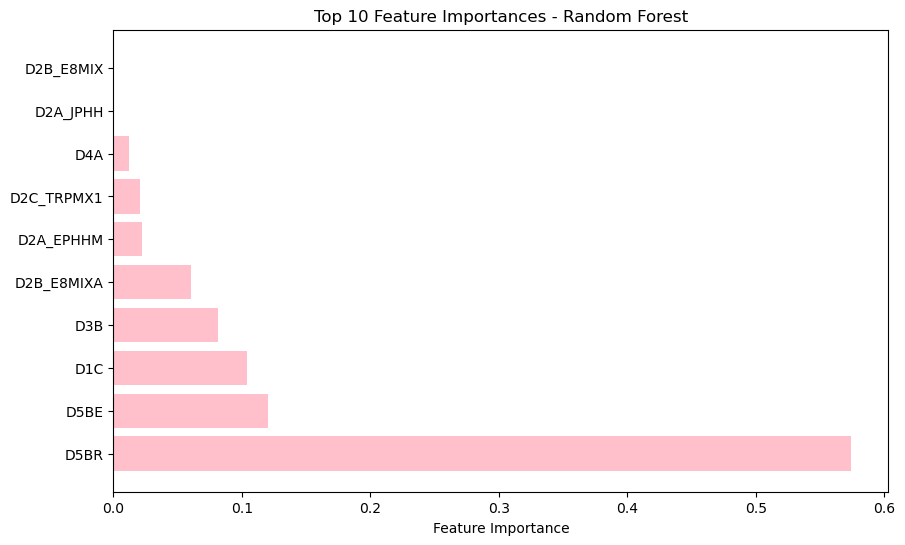

In [17]:
#Random Forest Importances non PCA data

feature_names = epa_df.columns.tolist()
feature_importances = pd.DataFrame(rfr.feature_importances_, index=feature_names, columns=['Importance'])

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = sorted_feature_importances.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_features['Importance'], align='center', color='pink')
plt.yticks(range(10), top_10_features.index)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators = 75, random_state = 18)

#Grid Search for estimators
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#estimators = [50, 100, 75, 125, 150, 200]
#param_grid = {'n_estimators': estimators}
#grid_search = GridSearchCV(etr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_estimators = grid_search.best_params_['n_estimators']
#print(f'Best Number of Estimators: {best_estimators}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_pca,y):
    
    X_train,X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=etr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    rmse_avg += RMSE
    mase_avg += mase
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values.append(rmse_avg)
avg_mase_values.append(mase_avg)


R-squared: 0.9291750777682264
R-squared: 0.9288348600646279
R-squared: 0.9298559516287915

RMSE Avg 1.163090151028993
MASE Avg 0.2275654264991547


In [19]:
#Extra Trees non PCA
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators = 75, random_state = 18)

#Grid Search for estimators
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)
#estimators = [50, 100, 75, 125, 150, 200]
#param_grid = {'n_estimators': estimators}
#grid_search = GridSearchCV(etr, param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)
#best_estimators = grid_search.best_params_['n_estimators']
#print(f'Best Number of Estimators: {best_estimators}')

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_scaled,y):
    
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=etr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    rmse_avg += RMSE
    mase_avg += mase
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values_npca.append(rmse_avg)
avg_mase_values_npca.append(mase_avg)

R-squared: 0.9970427443386236
R-squared: 0.9970534475712901
R-squared: 0.9971482586406492

RMSE Avg 0.23628591222983106
MASE Avg 0.043681957607239245


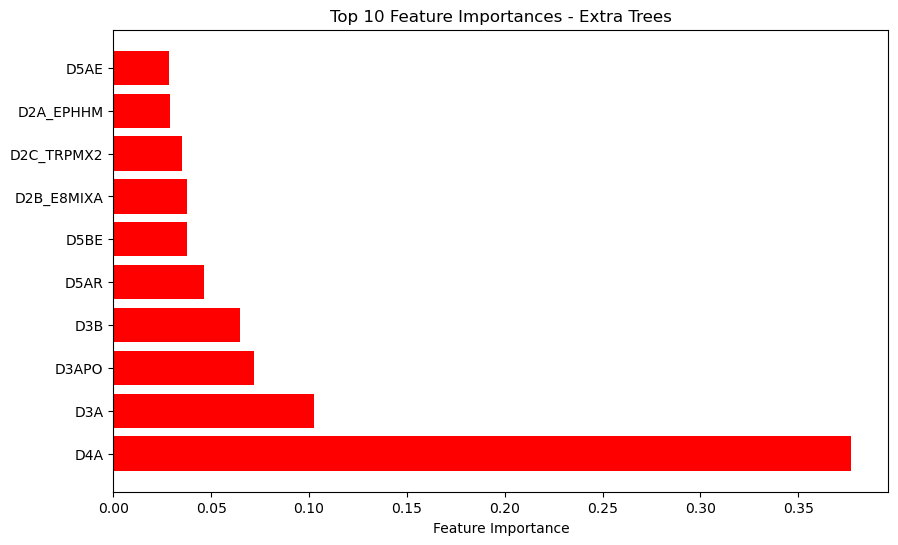

In [20]:
#Extra Trees feature importances non PCA data

feature_importances = pd.DataFrame(etr.feature_importances_, index=feature_names, columns=['Importance'])

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = sorted_feature_importances.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_features['Importance'], align='center', color='red')
plt.yticks(range(10), top_10_features.index)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Extra Trees')
plt.show()

In [21]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[
    ('random_forest', rfr),
    ('ridge_regression', rr),
    ('linear_regression', lr), 
    ('extratrees_regression', etr)
])

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_pca,y):
    
    X_train,X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=vr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    rmse_avg += RMSE
    mase_avg += mase
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values.append(rmse_avg)
avg_mase_values.append(mase_avg)

R-squared: 0.9066998436221085
R-squared: 0.906379305970265
R-squared: 0.9070279837035012

RMSE Avg 1.3359957993695986
MASE Avg 0.2816441615966115


In [22]:
#VR non PCA

from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[
    ('random_forest', rfr),
    ('ridge_regression', rr),
    ('linear_regression', lr), 
    ('extratrees_regression', etr)
])

rmse_avg = 0
mase_avg = 0

for train_index,test_index in kf.split(X_scaled,y):
    
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=vr.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(MSE)
    mae = mean_absolute_error(y_test, pred)
    mean_absolute_diff = np.mean(np.abs(np.diff(y_train)))
    mase = mae / mean_absolute_diff
    
    rmse_avg += RMSE
    mase_avg += mase
    
    r2 = r2_score(y_test, pred)
    print("R-squared:", r2)
    
print()
print("RMSE Avg", rmse_avg/3)
print("MASE Avg", mase_avg/3)

avg_rmse_values_npca.append(rmse_avg)
avg_mase_values_npca.append(mase_avg)

R-squared: 0.9645369959571727
R-squared: 0.9645737529216113
R-squared: 0.965053860763071

RMSE Avg 0.8215286947433286
MASE Avg 0.17609748974701148


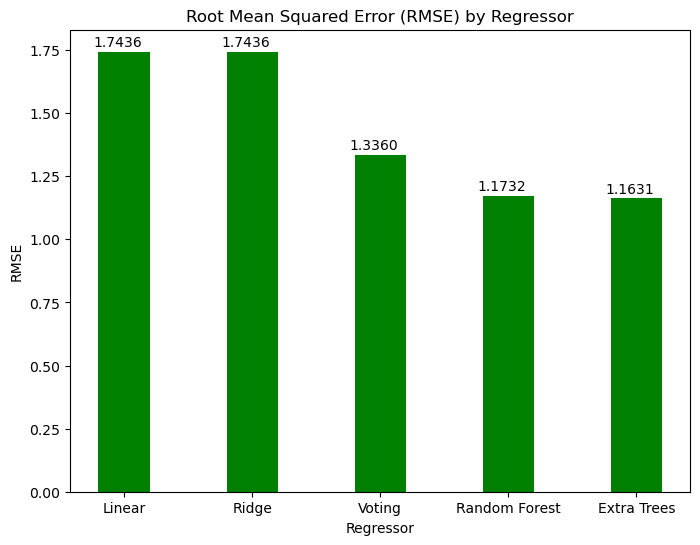

In [24]:
#Forgetting to add average to list
for x in range(len(avg_rmse_values)):
    avg_rmse_values[x] /= 3
    
for x in range(len(avg_mase_values)):
    avg_mase_values[x] /= 3
    
#Model Evaluations

#Average RMSE values PCA
regressor_names = ["Linear", "Ridge", "Random Forest", "Extra Trees", "Voting"]
sorted_indices = np.argsort(avg_rmse_values)[::-1]
sorted_rmse_values = np.array(avg_rmse_values)[sorted_indices]
sorted_regressor_names = np.array(regressor_names)[sorted_indices]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_regressor_names, sorted_rmse_values, color='green', width=0.4)

# Adding data labels
for bar, value in zip(bars, sorted_rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f"{value:.4f}", ha='center')

# Title and labels
plt.title('Root Mean Squared Error (RMSE) by Regressor')
plt.xlabel('Regressor')
plt.ylabel('RMSE')

# Show the plot
plt.show()

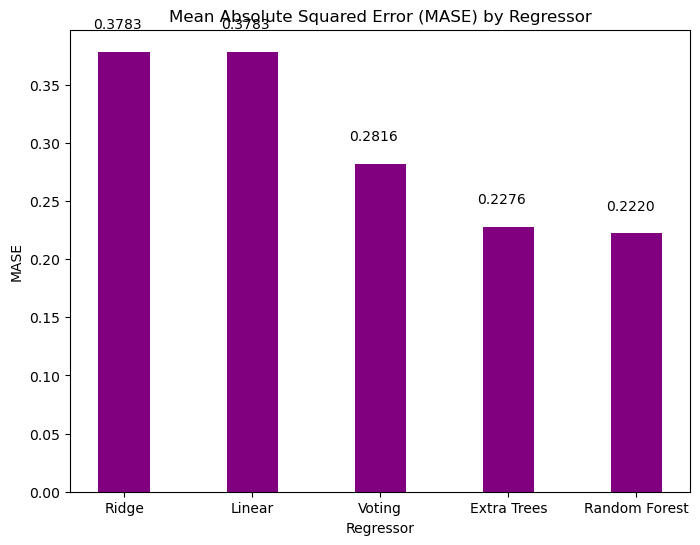

In [25]:
#Average MASE value PCA

sorted_indices = np.argsort(avg_mase_values)[::-1]
sorted_mase_values = np.array(avg_mase_values)[sorted_indices]
sorted_regressor_names = np.array(regressor_names)[sorted_indices]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_regressor_names, sorted_mase_values, color='purple', width=0.4)

# Adding data labels
for bar, value in zip(bars, sorted_mase_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f"{value:.4f}", ha='center')

# Title and labels
plt.title('Mean Absolute Squared Error (MASE) by Regressor')
plt.xlabel('Regressor')
plt.ylabel('MASE')

# Show the plot
plt.show()

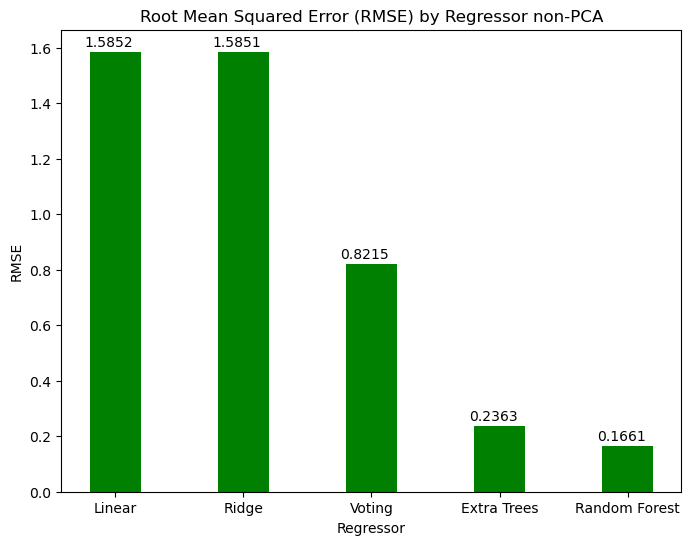

In [26]:
##Forgetting to add average to list
for x in range(len(avg_rmse_values_npca)):
    avg_rmse_values_npca[x] /= 3
    
for x in range(len(avg_mase_values_npca)):
    avg_mase_values_npca[x] /= 3
    
#Model Evaluations

#Average RMSE values non PCA
regressor_names = ["Linear", "Ridge", "Random Forest", "Extra Trees", "Voting"]
sorted_indices = np.argsort(avg_rmse_values_npca)[::-1]
sorted_rmse_values = np.array(avg_rmse_values_npca)[sorted_indices]
sorted_regressor_names = np.array(regressor_names)[sorted_indices]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_regressor_names, sorted_rmse_values, color='green', width=0.4)

# Adding data labels
for bar, value in zip(bars, sorted_rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f"{value:.4f}", ha='center')

# Title and labels
plt.title('Root Mean Squared Error (RMSE) by Regressor non-PCA')
plt.xlabel('Regressor')
plt.ylabel('RMSE')

# Show the plot
plt.show()

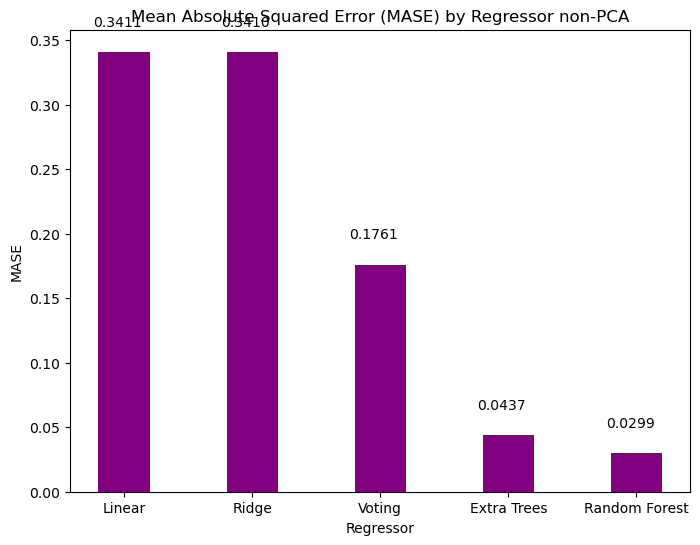

In [27]:
#Average MASE value PCA

sorted_indices = np.argsort(avg_mase_values_npca)[::-1]
sorted_mase_values = np.array(avg_mase_values_npca)[sorted_indices]
sorted_regressor_names = np.array(regressor_names)[sorted_indices]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_regressor_names, sorted_mase_values, color='purple', width=0.4)

# Adding data labels
for bar, value in zip(bars, sorted_mase_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f"{value:.4f}", ha='center')

# Title and labels
plt.title('Mean Absolute Squared Error (MASE) by Regressor non-PCA')
plt.xlabel('Regressor')
plt.ylabel('MASE')

# Show the plot
plt.show()